In [1]:
import polars as pl
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
# import rpy2.rlike.container as rlc

In [2]:
r = ro.r
r['source']('local-ci.r')

R[write to console]: 
Attaching package: ‘igraph’


R[write to console]: The following objects are masked from ‘package:stats’:

    decompose, spectrum


R[write to console]: The following object is masked from ‘package:base’:

    union


R[write to console]: Loading required package: graph

R[write to console]: Loading required package: BiocGenerics

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:igraph’:

    normalize, path, union


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, R

value,[RTYPES.CLOSXP]
visible,[RTYPES.LGLSXP]


In [3]:
# Loading the function we have defined in R.
run_ci_test_f = ro.globalenv['run_ci_test']
# Reading and processing data

df = pl.read_csv("./random-data-1.csv")
with (ro.default_converter + pandas2ri.converter).context():
    #converting it into r object for passing into r function
    df_r = ro.conversion.get_conversion().py2rpy(df.to_pandas())
    #Invoking the R function and getting the result
    df_result_r = run_ci_test_f(df_r)
    print(type(df_result_r))
    #Converting it back to a pandas dataframe.
    df_result = pl.from_pandas(ro.conversion.get_conversion().rpy2py(df_result_r['citestResults']))
    print(type(df_result_r['labels']))
    labels = list(df_result_r['labels'])

Testing if X= 1 is indep of Y= 2 given S={  }
Running Gaussian linear regression for  2 
Running Gaussian linear regression for  1 
p1: 0 and p2: 0 
Testing if X= 1 is indep of Y= 2 given S={ 3 }
Running Gaussian linear regression for  2 
Running Gaussian linear regression for  1 
p1: 0 and p2: 0 
Testing if X= 1 is indep of Y= 3 given S={  }
Running Gaussian linear regression for  3 
Running Gaussian linear regression for  1 
p1: 0.592971 and p2: 0.592971 
Testing if X= 1 is indep of Y= 3 given S={ 2 }
Running Gaussian linear regression for  3 
Running Gaussian linear regression for  1 
p1: 8.823707e-16 and p2: 8.823707e-16 
Testing if X= 2 is indep of Y= 3 given S={  }
Running Gaussian linear regression for  3 
Running Gaussian linear regression for  2 
p1: 0 and p2: 0 
Testing if X= 2 is indep of Y= 3 given S={ 1 }
Running Gaussian linear regression for  3 
Running Gaussian linear regression for  2 
p1: 0 and p2: 0 
$citestResults
  ord X Y S       pvalue
1   0 1 2   0.000000e+00
2 

In [4]:
# TODO create dataclass with citest result df and labels
# TODO: pickle label list

In [5]:
#df_result.write_parquet('./ci-data-1.parquet')

In [6]:
r['source']('aggregation.r')

value,[RTYPES.CLOSXP]
visible,[RTYPES.LGLSXP]


In [7]:
from collections import OrderedDict

In [ ]:
import pandas as pd
df1 = pd.read_parquet('ci-data-1.parquet')
df2 = pd.read_parquet('ci-data-1.parquet')

labels1 = ['a', 'v', 'c']
labels2 = ['a', 'c', 'v']

In [14]:
# Loading the function we have defined in R.
aggregate_ci_results_f = ro.globalenv['aggregate_ci_results']
# Reading and processing data

#df = pl.read_csv("./random-data-1.csv")
with (ro.default_converter + pandas2ri.converter).context():
    #converting it into r object for passing into r function|
    d = [('citestResults', ro.conversion.get_conversion().py2rpy(df_result.to_pandas())), ('labels', ro.StrVector(labels))]
    od = OrderedDict(d)
    lv = ro.ListVector(od)
    #client_data = ro.ListVector([lv])
    #print(client_data)
    # TODO: make this lv another list vector for each client
    df_result_r2 = aggregate_ci_results_f([lv])
    
    #df_result2 = pl.from_pandas(ro.conversion.get_conversion().rpy2py(df_result_r))

[[1]]
[[1]]$citestResults
  ord X Y S       pvalue
0   0 1 2   0.000000e+00
1   0 1 3   5.929710e-01
2   0 2 3   0.000000e+00
3   1 1 2 3 0.000000e+00
4   1 1 3 2 8.823707e-16
5   1 2 3 1 0.000000e+00

[[1]]$labels
[1] "W" "Y" "Z"


[1] "YEAH"
$citestResults
  ord X Y S       pvalue
0   0 1 2   0.000000e+00
1   0 1 3   5.929710e-01
2   0 2 3   0.000000e+00
3   1 1 2 3 0.000000e+00
4   1 1 3 2 8.823707e-16
5   1 2 3 1 0.000000e+00

$labels
[1] "W" "Y" "Z"

[1] "W" "Y" "Z"
[1] 3
Order=0; remaining edges:6
x= 1  y= 2  S=  : pval = 0 
x= 1  y= 3  S=  : pval = 0.592971 
x= 2  y= 1  S=  : pval = 0 
x= 2  y= 3  S=  : pval = 0 
x= 3  y= 2  S=  : pval = 0 
Order=1; remaining edges:4
x= 2  y= 1  S= 3 : pval = 0 
x= 2  y= 3  S= 1 : pval = 0 

Compute collider:

 1 *-> 2 <-* 3 

 3 *-> 2 <-* 1 

Possible D-Sep of 1 is: 2 3 

y =   2
.........
ord =  1 

Possible D-Sep of 2 is: 1 3 

y =   1
.........

y =   3
.........

Possible D-Sep of 3 is: 1 2 

y =   2
.........
ord =  1 
(1) Adding an arrowh

In [15]:
df_result_r2

o{'G_PAG_List': o{'None': [[0. 2. 0.]
 [1. 0. 1.]
 [0. 2. 0.]], }, 'Gi_PAG_list': o{'None': [[0. 2. 0.]
 [1. 0. 1.]
 [0. 2. 0.]], }, }

In [16]:
import pandas as pd
df1 = pd.read_parquet('ci-data-1.parquet')
df2 = pd.read_parquet('ci-data-1.parquet')

labels1 = ['a', 'v', 'c']
labels2 = ['a', 'c', 'v']

In [17]:
# Loading the function we have defined in R.
aggregate_ci_results_f = ro.globalenv['aggregate_ci_results']
# Reading and processing data

#df = pl.read_csv("./random-data-1.csv")
with (ro.default_converter + pandas2ri.converter).context():
    #converting it into r object for passing into r function|
    d = [('citestResults', ro.conversion.get_conversion().py2rpy(df1)), ('labels', ro.StrVector(labels1))]
    d2 = [('citestResults', ro.conversion.get_conversion().py2rpy(df2)), ('labels', ro.StrVector(labels2))]
    od = OrderedDict(d)
    od2 = OrderedDict(d2)
    lv = ro.ListVector(od)
    lv2 = ro.ListVector(od2)
    #all_data = ro.ListVector([lv, lv2])
    #print(client_data)
    # TODO: make this lv another list vector for each client
    result = aggregate_ci_results_f([lv, lv2])
    
    #df_result2 = pl.from_pandas(ro.conversion.get_conversion().rpy2py(df_result_r))

[[1]]
[[1]]$citestResults
  ord X Y S       pvalue
0   0 1 2   0.000000e+00
1   0 1 3   5.929710e-01
2   0 2 3   0.000000e+00
3   1 1 2 3 0.000000e+00
4   1 1 3 2 8.823707e-16
5   1 2 3 1 0.000000e+00

[[1]]$labels
[1] "a" "v" "c"


[[2]]
[[2]]$citestResults
  ord X Y S       pvalue
0   0 1 2   0.000000e+00
1   0 1 3   5.929710e-01
2   0 2 3   0.000000e+00
3   1 1 2 3 0.000000e+00
4   1 1 3 2 8.823707e-16
5   1 2 3 1 0.000000e+00

[[2]]$labels
[1] "a" "c" "v"


[1] "YEAH"
$citestResults
  ord X Y S       pvalue
0   0 1 2   0.000000e+00
1   0 1 3   5.929710e-01
2   0 2 3   0.000000e+00
3   1 1 2 3 0.000000e+00
4   1 1 3 2 8.823707e-16
5   1 2 3 1 0.000000e+00

$labels
[1] "a" "v" "c"

[1] "YEAH"
$citestResults
  ord X Y S       pvalue
0   0 1 2   0.000000e+00
1   0 1 3   5.929710e-01
2   0 2 3   0.000000e+00
3   1 1 2 3 0.000000e+00
4   1 1 3 2 8.823707e-16
5   1 2 3 1 0.000000e+00

$labels
[1] "a" "c" "v"

[1] "a" "v" "c"
[1] 3
Order=0; remaining edges:6
x= 1  y= 2  S=  : pval = 0 
x= 

In [18]:
result

o{'G_PAG_List': o{'None': [[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]], }, 'Gi_PAG_list': o{'None': [[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]], 'None': [[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]], }, }

In [21]:
import graphviz

In [23]:
graph = graphviz.Digraph()

In [24]:
pag = result['G_PAG_List']

In [50]:
mat = list(pag.items())[0][1]

In [58]:
mat

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [51]:
var_lookup = {0: 'A', 1: 'B', 2: 'C'}
for i in range(len(mat)):
    for j in range(len(mat[i])):
        if mat[i][j] == 1:
            graph.edge(var_lookup[i], var_lookup[j])
        elif mat[i][j] == 2:
            graph.edge(var_lookup[i], var_lookup[j], arrow_type='odot')

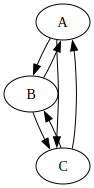

In [57]:
graph